In [2]:
import matplotlib.pyplot as plt

In [3]:
cfg_interval = 8.45
no_guidance = 13.14

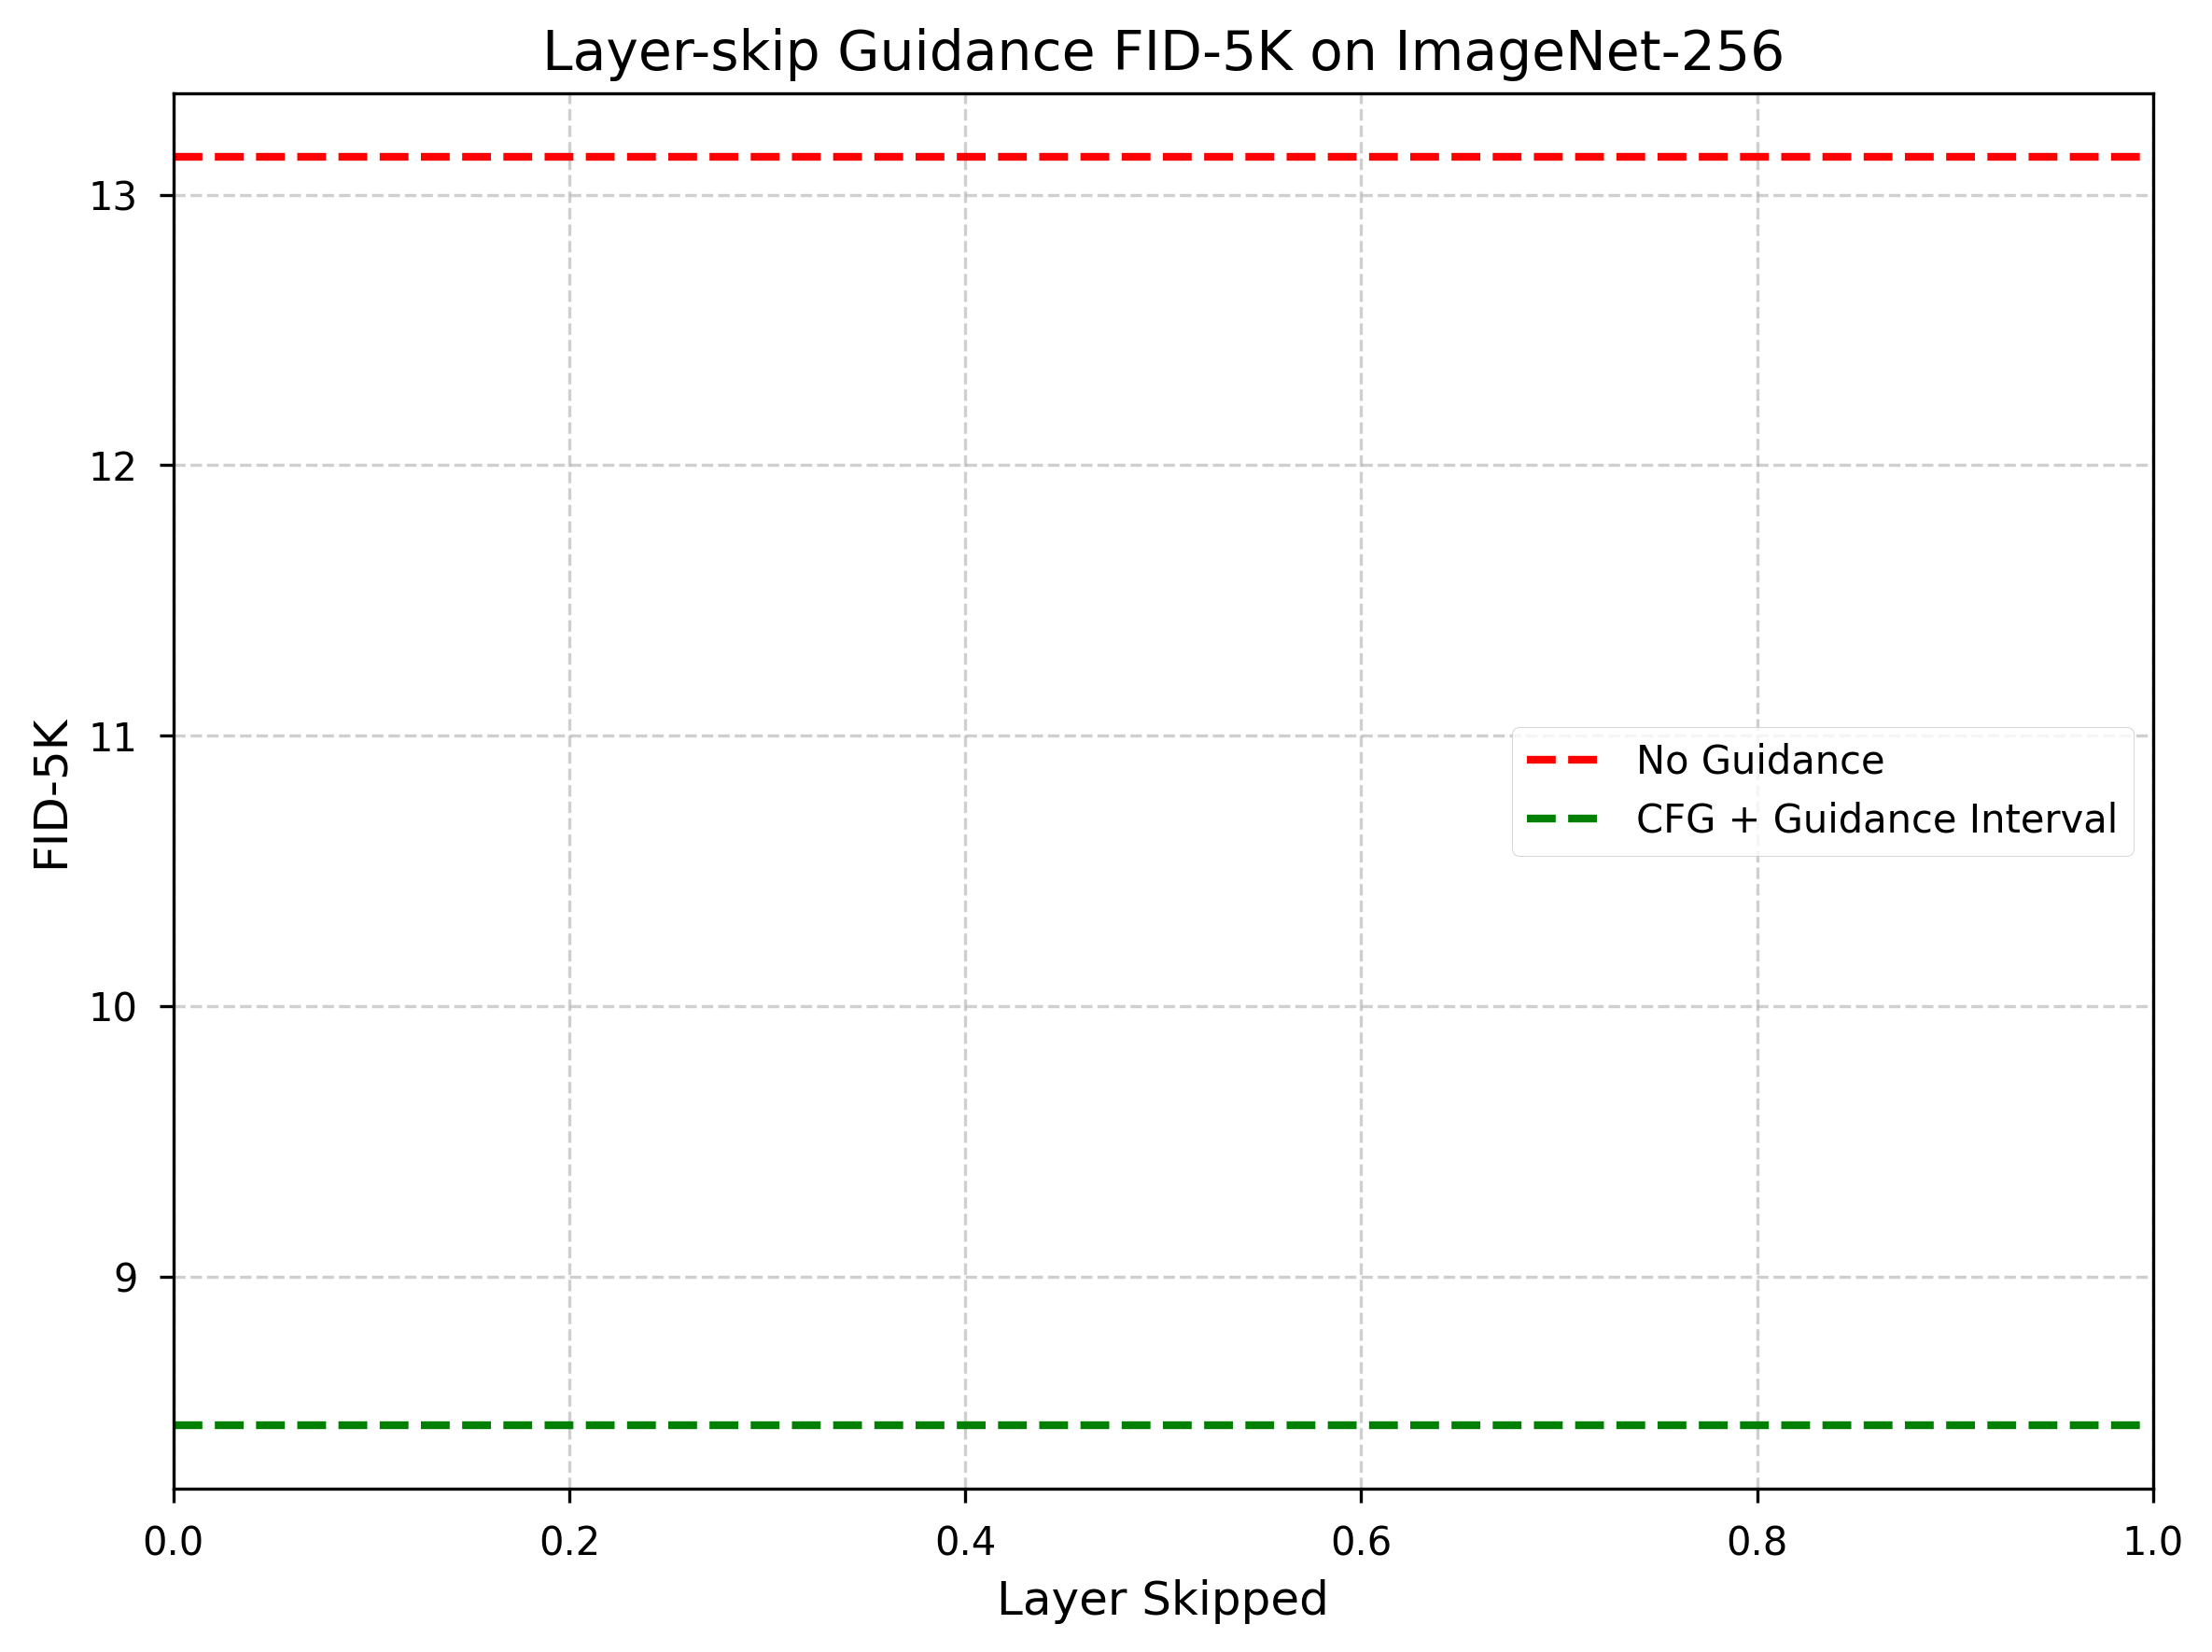

In [7]:
# Set publication-quality settings
plt.style.use('seaborn-v0_8-paper')  # Use a clean style for publication
plt.figure(figsize=(8, 6), dpi=300)  # High resolution

# Plot horizontal lines
plt.axhline(y=no_guidance, color='red', linestyle='--', linewidth=2, label='No Guidance')
plt.axhline(y=cfg_interval, color='green', linestyle='--', linewidth=2, label='CFG + Guidance Interval')

# Add labels, title, and legend
plt.title("Layer-skip Guidance FID-5K on ImageNet-256", fontsize=14)
plt.xlabel("Layer Skipped", fontsize=12)
plt.ylabel("FID-5K", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc="best")

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Save as a publication-quality figure
plt.tight_layout()
plt.savefig("lsg.png", dpi=300)

# Show the plot
plt.show()
